In [637]:
import sqlite3

In [638]:
connection = sqlite3.connect('movie.sqlite')

In [639]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Show the tables in the dataset

In [694]:
query = "SELECT name FROM main.sqlite_master WHERE type='table' ORDER BY name ; "
tables = pd.read_sql_query(query,connection)
tables # display the list of tables 

,name
0,IMDB
1,earning
2,genre


In [696]:
# create a cursor object
cur = connection.cursor()

In [642]:
# function turns sql query into dataframe
def to_movies(query):
    # execute the query
    cur.execute(query)
    # gets the rows
    rows = cur.fetchall()
    # gets the columns 
    columns = [col[0] for col in cur.description]
    # return as a dataframe
    return pd.DataFrame(rows, columns=columns)

### Display the IMDB table information 

In [644]:
#table data
IMDB_query = """
SELECT * 
FROM IMDB;
"""
imdb_df = to_movies(IMDB_query)
imdb_df

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,99524,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,70850,...,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,22942,...,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,38262,Whiplash (2014),8.5,492285,88,3300000.0,107 min,110404,161864,132656,...,8.3,8.3,8.2,8.1,8.1,8.2,8.7,8.0,8.6,8.4
113,10023,Wreck-It Ralph (2012),7.7,295125,72,165000000.0,,41980,50262,96477,...,7.6,7.6,7.7,7.4,7.4,7.5,7.4,7.2,7.9,7.6
114,27783,X-Men: Days of Future Past (2014),8.0,560736,74,200000000.0,132 min,91765,127521,183578,...,7.8,7.8,8.0,7.7,7.7,7.9,7.5,7.4,8.1,7.9
115,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,200144,...,7.7,7.6,7.8,7.6,7.5,7.7,7.6,7.3,7.8,7.7


### Display the earning table information 

In [646]:
#table data
earning_query = """
SELECT * 
FROM earning;
"""
earning_df= to_movies(earning_query)
earning_df

,Movie_id,Domestic,Worldwide
0,36809,56671993,1.877332e+08
1,30114,18335230,6.073880e+07
2,37367,35014192,3.918778e+07
3,49473,15322921,8.710045e+07
4,14867,6739492,1.983949e+07
...,...,...,...
112,38262,13092000,4.898204e+07
113,10023,189422889,4.712229e+08
114,27783,233921534,7.478628e+08
115,42294,146408305,3.536241e+08


### Display the genre table information 

In [648]:
#table data
genre_query = """
SELECT * 
FROM genre;
"""
genre_df = to_movies(genre_query)
genre_df

,Movie_id,genre
0,36809,Biography
1,30114,Adventure
2,37367,Comedy
3,49473,Comedy
4,14867,Drama
...,...,...
346,38262,
347,10023,Comedy
348,27783,Sci-Fi
349,42294,Sci-Fi


## Question 1: What are the top 5 highest-rated movies?

In [650]:
# Sort the IMDB dataframe by the rating column where the order is in descending order 
top_rated_movies = imdb_df.sort_values(by="Rating", ascending=False)
# Print the top 5 movies and show their 'Title' and 'Rating' only.
print(top_rated_movies[["Title", "Rating"]])


                                  Title  Rating
45                     Inception (2010)     8.8
47                  Interstellar (2014)     8.6
112                     Whiplash (2014)     8.5
24              Django Unchained (2012)     8.4
86         The Dark Knight Rises (2012)     8.4
..                                  ...     ...
12               Bridge of Spies (2015)     7.6
52               Les Misİrables (2012)     7.6
70   Scott Pilgrim vs. the World (2010)     7.5
42                          Hugo (2011)     7.5
54                 Lone Survivor (2013)     7.5

[117 rows x 2 columns]


In [651]:
# print the first top 5 movies with the title and rating
print(top_rated_movies[["Title", "Rating"]][:5])

                            Title  Rating
45               Inception (2010)     8.8
47            Interstellar (2014)     8.6
112               Whiplash (2014)     8.5
24        Django Unchained (2012)     8.4
86   The Dark Knight Rises (2012)     8.4


In [698]:
#removing the year in parentheses from the title column 
top_rated_movies["Title"]=top_rated_movies["Title"].str.replace(r"\(\d{4}\)","",regex=True)

In [700]:
print(top_rated_movies[["Title", "Rating"]].head(5))

                      Title  Rating
45               Inception      8.8
47            Interstellar      8.6
112               Whiplash      8.5
24        Django Unchained      8.4
86   The Dark Knight Rises      8.4


## Question 2: What are the top 5 movies by worldwide earnings?

In [703]:
# merging the earning_df and imdb_df dataframes based on the movie_id column
merge_df=pd.merge(earning_df,imdb_df[["Movie_id", "Title"]], on="Movie_id", how="inner")

# Sorting the earnings data frame by the worldwide column in descending order so that the movies with the highest worldwide earnings appear first. 
top_earning_movies =merge_df.sort_values(by="Worldwide", ascending=False)

# showing the top 5 movies with the title and worldwide column
print(top_earning_movies[["Title", "Worldwide"]])


                                   Title     Worldwide
79   Star Wars: The Force Awakens (2015)  2.068224e+09
83                   The Avengers (2012)  1.518813e+09
13     Captain America: Civil War (2016)  1.153304e+09
76                        Skyfall (2012)  1.108561e+09
86          The Dark Knight Rises (2012)  1.084939e+09
..                                   ...           ...
23                     Disconnect (2012)  1.436900e+06
71                  Short Term 12 (2013)  1.013100e+06
44                I, Daniel Blake (2016)  2.603540e+05
22                     Detachment (2011)  7.268900e+04
109                   Tyrannosaur (2011)  2.232100e+04

[117 rows x 2 columns]


In [705]:
# removing the year form the title column 
top_earning_movies["Title"]=top_earning_movies["Title"].str.replace(r"\(\d{4}\)","",regex=True)

# formatting the worldwide columns with commas
top_earning_movies["Worldwide"] = top_earning_movies["Worldwide"].apply(lambda x: f"{x:,.0f}")

# printing the top earning movies with the title and worldwide column
print(top_earning_movies[["Title", "Worldwide"]].head(5))

                            Title      Worldwide
79  Star Wars: The Force Awakens   2,068,223,624
83                  The Avengers   1,518,812,988
13    Captain America: Civil War   1,153,304,495
76                       Skyfall   1,108,561,013
86         The Dark Knight Rises   1,084,939,099


### Question 3: What are the top earning genres in the dataset?

In [708]:
# cleaning data with any missing or blank genres
cleaned_genre_df=genre_df[genre_df['genre'].notnull() & (genre_df['genre'].str.strip() != "")]

# count the number of movies in each genre
genre_counts = cleaned_genre_df['genre'].value_counts()


In [710]:
genre_counts # show the genre with the number of movies 

genre
Drama        77
Adventure    43
Action       33
Comedy       31
Biography    21
Sci-Fi       18
Thriller     14
Animation    13
Romance      13
Crime        11
Mystery       7
Fantasy       7
History       6
Family        3
Sport         3
Music         3
Western       2
War           2
Horror        2
Musical       1
Name: count, dtype: int64

In [712]:
cleaned_genre_df # show the cleaned data 

,Movie_id,genre
0,36809,Biography
1,30114,Adventure
2,37367,Comedy
3,49473,Comedy
4,14867,Drama
...,...,...
344,17545,Sport
347,10023,Comedy
348,27783,Sci-Fi
349,42294,Sci-Fi


In [714]:
# merge the earnings and genre data on movie_id
merged_df = pd.merge(earning_df, cleaned_genre_df, on = "Movie_id", how="inner")

# group by genre and calculate the total worldwide earnings
genre_earnings = merged_df.groupby('genre')['Worldwide'].sum()

#combing genre counts and earnings into a single dataframe
genre_summary = pd.DataFrame({
    'Genre': genre_counts.index,  # genre names from the counts
    'Movie Count': genre_counts.values,   # movie counts for each genre
    'Total Earnings': genre_earnings.reindex(genre_counts.index)   # aligning earnings 
}).reset_index(drop=True)  # resetting index to avoid repetition 

# sorting the genres by total earnings 
genre_summary=genre_summary.sort_values(by="Total Earnings", ascending=False)

# Print the summary 
print(genre_summary)

        Genre  Movie Count  Total Earnings
1   Adventure           43    2.662983e+10
2      Action           33    1.986750e+10
0       Drama           77    1.301904e+10
5      Sci-Fi           18    1.115745e+10
3      Comedy           31    8.585548e+09
7   Animation           13    7.608724e+09
11    Fantasy            7    5.923915e+09
6    Thriller           14    4.971838e+09
4   Biography           21    3.621331e+09
10    Mystery            7    2.124148e+09
9       Crime           11    1.644199e+09
8     Romance           13    1.594027e+09
13     Family            3    1.215983e+09
12    History            6    1.053841e+09
16    Western            2    6.776452e+08
15      Music            3    5.082762e+08
19    Musical            1    4.418098e+08
14      Sport            3    3.068309e+08
17        War            2    2.884042e+08
18     Horror            2    1.101274e+07


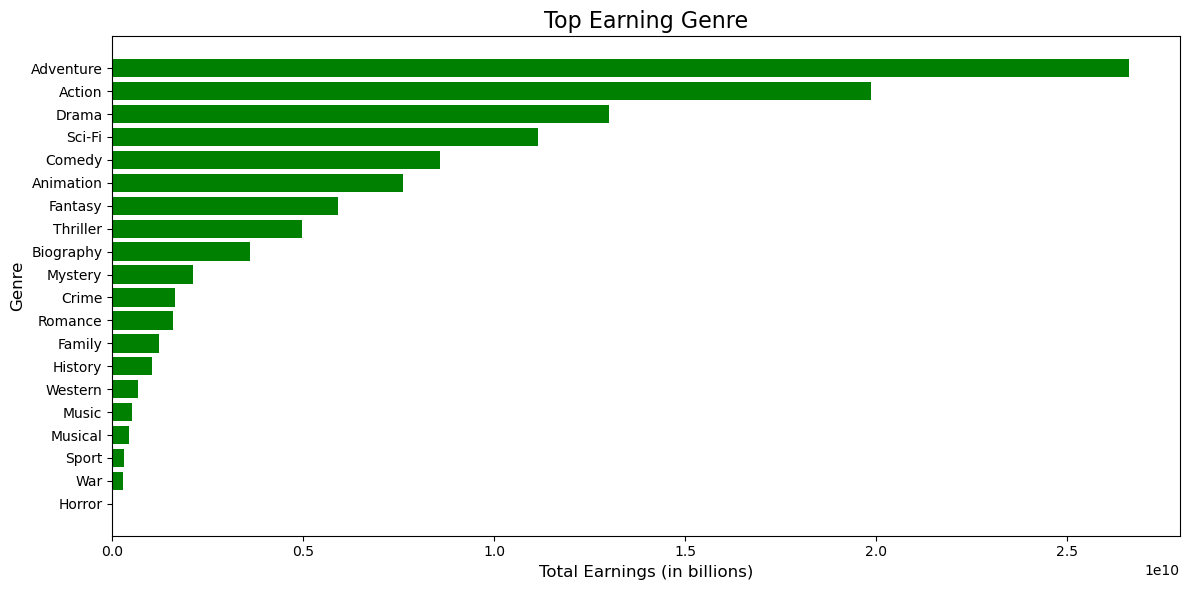

In [716]:
genre_summary_sorted=genre_summary.sort_values(by="Total Earnings", ascending=False)

# creating a line plot
plt.figure(figsize=(12,6))
plt.barh(genre_summary["Genre"], genre_summary["Total Earnings"],  color ='green')

# adding title and labels
plt.title("Top Earning Genre", fontsize=16)
plt.xlabel("Total Earnings (in billions)", fontsize=12)
plt.ylabel("Genre", fontsize=12)

# adjust layout 
plt.gca().invert_yaxis()

plt.tight_layout()

#display the plot
plt.show()

### Question 4: What are the movies that received the most votes?

In [664]:
# sorting the imdv dataframe by the votes column in descending order
most_voted_movies = imdb_df.sort_values(by= 'TotalVotes', ascending=False)
most_voted_movies


,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
45,46824,Inception (2010),8.8,1609713,74,160000000.0,148 min,584839,485218,304457,...,8.7,8.7,8.5,8.1,8.1,8.0,8.6,8.2,8.7,8.8
86,29419,The Dark Knight Rises (2012),8.4,1240780,78,250000000.0,164 min,380589,341965,281426,...,8.3,8.3,8.2,7.9,7.9,7.9,7.8,7.8,8.4,8.4
47,46900,Interstellar (2014),8.6,1075163,74,165000000.0,169 min,394006,291172,199884,...,8.4,8.4,8.2,7.9,7.9,7.7,8.2,7.9,8.4,8.5
24,11971,Django Unchained (2012),8.4,1056822,81,100000000.0,165 min,234824,339329,286911,...,8.3,8.3,8.3,8.0,8.0,8.1,8.0,7.8,8.4,8.4
83,10454,The Avengers (2012),8.1,1056773,69,220000000.0,143 min,260257,234203,264290,...,8.0,8.0,8.1,7.9,7.9,8.1,7.9,7.4,8.3,7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,41048,Sing Street (2016),8.0,56066,79,4000000.0,,8401,12738,19689,...,7.8,7.8,7.8,7.9,7.8,8.0,8.2,7.2,8.1,7.9
98,40310,The Little Prince (2015),7.8,40777,70,81200000.0,108 min,7565,7321,11668,...,7.6,7.5,7.9,7.5,7.4,7.9,7.0,6.6,7.7,7.7
65,12744,Pride (2014),7.8,40577,79,,,6231,7731,13286,...,7.6,7.5,7.9,7.9,7.8,8.2,8.2,6.7,7.7,7.7
44,29611,"I, Daniel Blake (2016)",7.9,28350,78,,,3576,5803,9651,...,7.8,7.8,8.1,8.0,8.0,8.2,9.1,6.9,7.6,7.9


In [665]:
# Filtering out rows where totalvotes is null
filtered_imdb_df=imdb_df[imdb_df['TotalVotes'].notnull()]

#sorting by totalvotes in descending order and selecting the top 5 rows 
top_voted_movies=filtered_imdb_df.sort_values(by='TotalVotes', ascending=False)

#removing the year in parentheses from the title column 
top_voted_movies["Title"]=top_voted_movies["Title"].str.replace(r"\(\d{4}\)","",regex=True)

# selecting only the title and total votes columns 
top_voted_movies=top_voted_movies[['Title', 'TotalVotes']]

#display the output
print(top_voted_movies)
                                              

                      Title  TotalVotes
45               Inception      1609713
86   The Dark Knight Rises      1240780
47            Interstellar      1075163
24        Django Unchained      1056822
83            The Avengers      1056773
..                      ...         ...
75             Sing Street        56066
98       The Little Prince        40777
65                   Pride        40577
44         I, Daniel Blake        28350
109            Tyrannosaur        26016

[117 rows x 2 columns]


In [666]:
print(top_voted_movies[['Title', 'TotalVotes']].head(20))


                                  Title  TotalVotes
45                           Inception      1609713
86               The Dark Knight Rises      1240780
47                        Interstellar      1075163
24                    Django Unchained      1056822
83                        The Avengers      1056773
105            The Wolf of Wall Street       881984
72                      Shutter Island       871391
34             Guardians of the Galaxy       778220
79        Star Wars: The Force Awakens       676732
92   The Hobbit: An Unexpected Journey       675678
20                            Deadpool       652127
55                  Mad Max: Fury Road       649540
32                           Gone Girl       649474
33                             Gravity       630890
106                        Toy Story 3       596385
10                          Black Swan       587893
74             Silver Linings Playbook       570344
99                         The Martian       569347
114         

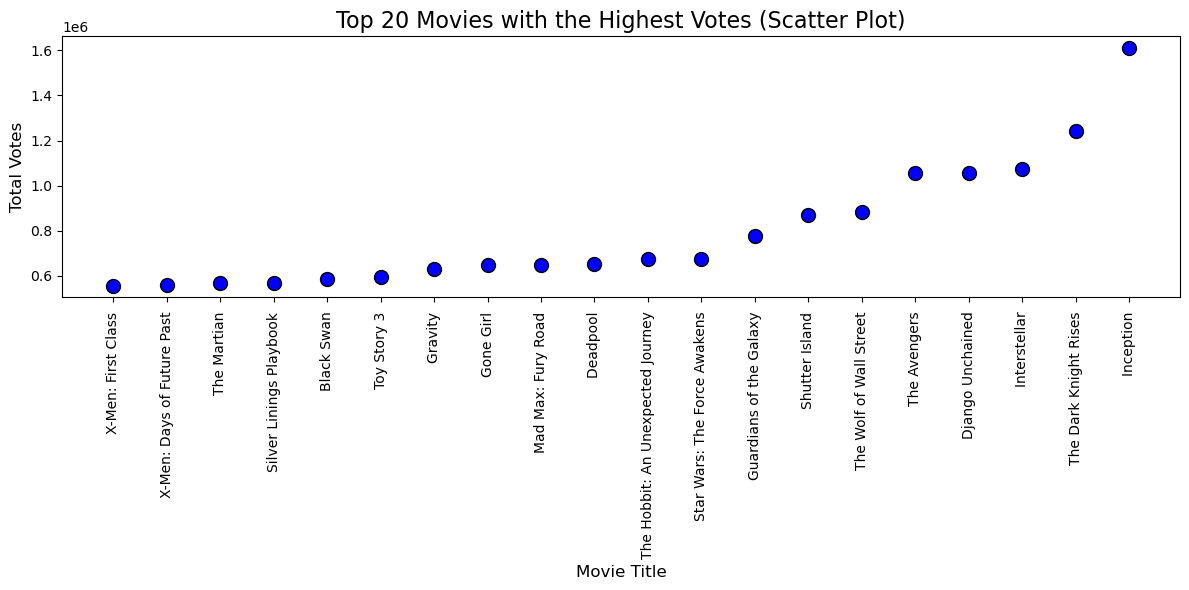

In [667]:
import matplotlib.pyplot as plt
top_voted_movies['TotalVotes'] =pd.to_numeric(top_voted_movies['TotalVotes'],errors='coerce')
# Select the top 20 movies based on total votes
top_20_voted_movies = top_voted_movies[['Title', 'TotalVotes']].head(20)

# Sorting by votes to make the plot clearer
top_20_voted_movies = top_20_voted_movies.sort_values(by="TotalVotes", ascending=True)

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(top_20_voted_movies['Title'], top_20_voted_movies['TotalVotes'], color='b', s=100, edgecolor='black')

# Adding titles and labels
plt.title('Top 20 Movies with the Highest Votes (Scatter Plot)', fontsize=16)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()